<a href="https://colab.research.google.com/github/glycoaddict/omicslecture/blob/main/ntu_bs6219_inferential_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Installs and imports

The statsmodels package on colab is not the most updated version. We must update it using the special `!` syntax to run command line commands.


In [ ]:
# note that you usually need to restart the kernel after updating.

!pip install statsmodels==0.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.nonparametric import rank_compare_2indep
import statsmodels.stats.weightstats as ws

import scipy.stats as sps

import sklearn.datasets as dt
from sklearn.neighbors import KernelDensity

# check the correct version is installed
print(sm.show_versions()) 

print(rank_compare_2indep)

sns.set(rc = {'figure.figsize':(20,10)}, font_scale=2.0)


INSTALLED VERSIONS
------------------
Python: 3.7.13.final.0
OS: Linux 5.4.188+ #1 SMP Sun Apr 24 10:03:06 PDT 2022 x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8

statsmodels

Installed: 0.13.2 (/usr/local/lib/python3.7/dist-packages/statsmodels)

Required Dependencies

cython: 0.29.32 (/usr/local/lib/python3.7/dist-packages/Cython)
numpy: 1.21.6 (/usr/local/lib/python3.7/dist-packages/numpy)
scipy: 1.7.3 (/usr/local/lib/python3.7/dist-packages/scipy)
pandas: 1.3.5 (/usr/local/lib/python3.7/dist-packages/pandas)
    dateutil: 2.8.2 (/usr/local/lib/python3.7/dist-packages/dateutil)
patsy: 0.5.2 (/usr/local/lib/python3.7/dist-packages/patsy)

Optional Dependencies

matplotlib: 3.2.2 (/usr/local/lib/python3.7/dist-packages/matplotlib)
    backend: module://ipykernel.pylab.backend_inline 
cvxopt: 1.3.0 (/usr/local/lib/python3.7/dist-packages/cvxopt)
joblib: 1.1.0 (/usr/local/lib/python3.7/dist-packages/joblib)

Developer Tools

IPython: 5.5.0 (/usr/local/lib/python3.7/dist-packa

# T-test for comparing means of two normally distributed, unpaired samples

Null Hypothesis = no difference in mean

## Data Generation

### setting random seed so we generate the same data

The hash of `x+y` in this instance is: -3002633823347733113

Does it match with the expected? --> True

If this is False, re-initialise the random seed.


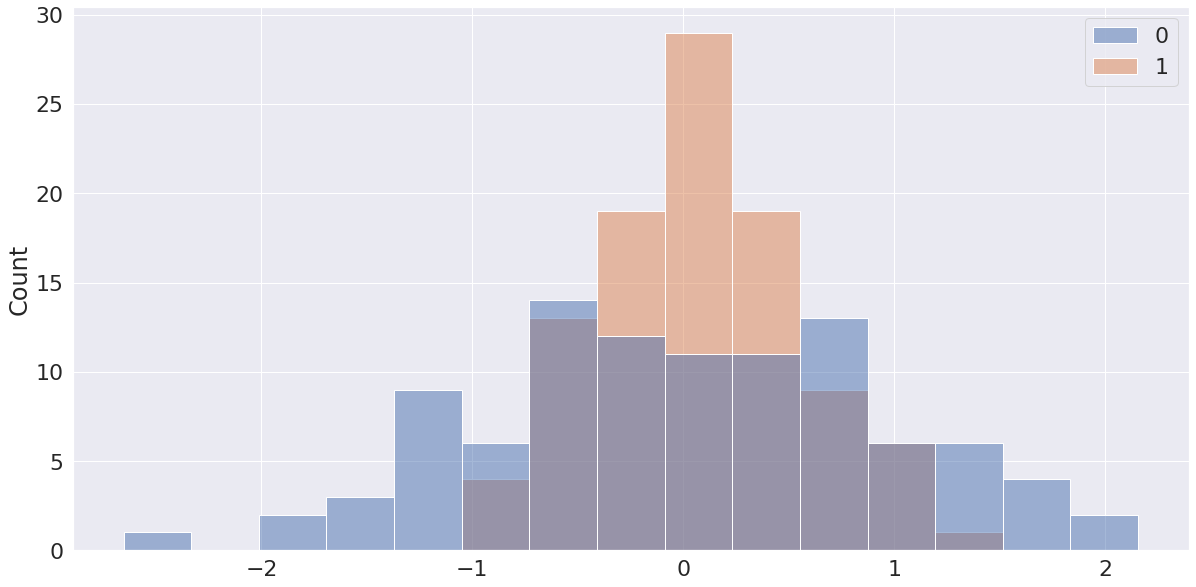

In [ ]:
seed = 11
rand_state = 11
rand = np.random.RandomState(seed)

x = rand.normal(loc=0.0, scale=1.0, size=100)
y = rand.normal(loc=0.1, scale=0.5, size=100)

sns.histplot([x,y])

this_instance_hash_x = hash(tuple(x))
this_instance_hash_y = hash(tuple(y))
this_instance_hash = this_instance_hash_x + this_instance_hash_y

print(f'The hash of `x+y` in this instance is: {this_instance_hash}\n\nDoes it match with the expected? --> {(this_instance_hash == -3002633823347733113)}\n')

print('If this is False, re-initialise the random seed.')

## T-test

In [ ]:
eq_var = sps.ttest_ind(x,y, equal_var=True)
diff_var = sps.ttest_ind(x,y, equal_var=False)
one_tailed_less = sps.ttest_ind(x,y, equal_var=False, alternative='less')
one_tailed_greater = sps.ttest_ind(x,y, equal_var=False, alternative='greater')

pd.DataFrame([eq_var, diff_var, one_tailed_less, one_tailed_greater], index=['eq_var_Students', 'diff_var_Welchs', 'one_tailed_less', 'one_tailed_greater'])

,statistic,pvalue
eq_var_Students,-0.85915,0.391297
diff_var_Welchs,-0.85915,0.391654
one_tailed_less,-0.85915,0.195827
one_tailed_greater,-0.85915,0.804173


## how does Welch's test compare with Student's T-test?

Recall that Welch's Test is for *unequal* variances

To illustrate the difference, we are going to generate many sets of data and run both the Welch's and Student's T-tests.

`N` is the number of observations generated for the first sample. The second sample will have 40% fewer observations, just so we have unequal numbers and variances.

### Generate data of unequal variance, number, and run tests on them

In [ ]:
seed = 11
rand_state = 11
rand = np.random.RandomState(seed)

list_of_pvalues = []
stored_xy = []

for i in range(15,31,1):
    # i=20
    N = i*5
    N2 = i*3

    # generate normally distributed data about a mean, with SD specified, and number of observations
    x = rand.normal(loc=0.0, scale=1.0, size=N)
    y = rand.normal(loc=0.25, scale=0.5, size=N2)

    if (N==110) or (N==130):
        stored_xy.append([N, x, y])

    ##### STATISTICAL TESTS HERE ######
    eq_var = sps.ttest_ind(x,y, equal_var=True)
    diff_var = sps.ttest_ind(x,y, equal_var=False)    

    list_of_pvalues.append([N, 'eq_var', eq_var.pvalue])
    list_of_pvalues.append([N, 'diff_var', diff_var.pvalue])

df_pvalues = pd.DataFrame(list_of_pvalues, columns=['N', 'var', 'p-value'])

df_pvalues.head()

,N,var,p-value
0,75,eq_var,0.112909
1,75,diff_var,0.072666
2,80,eq_var,0.122362
3,80,diff_var,0.080707
4,85,eq_var,0.056816


### Visualise the results 

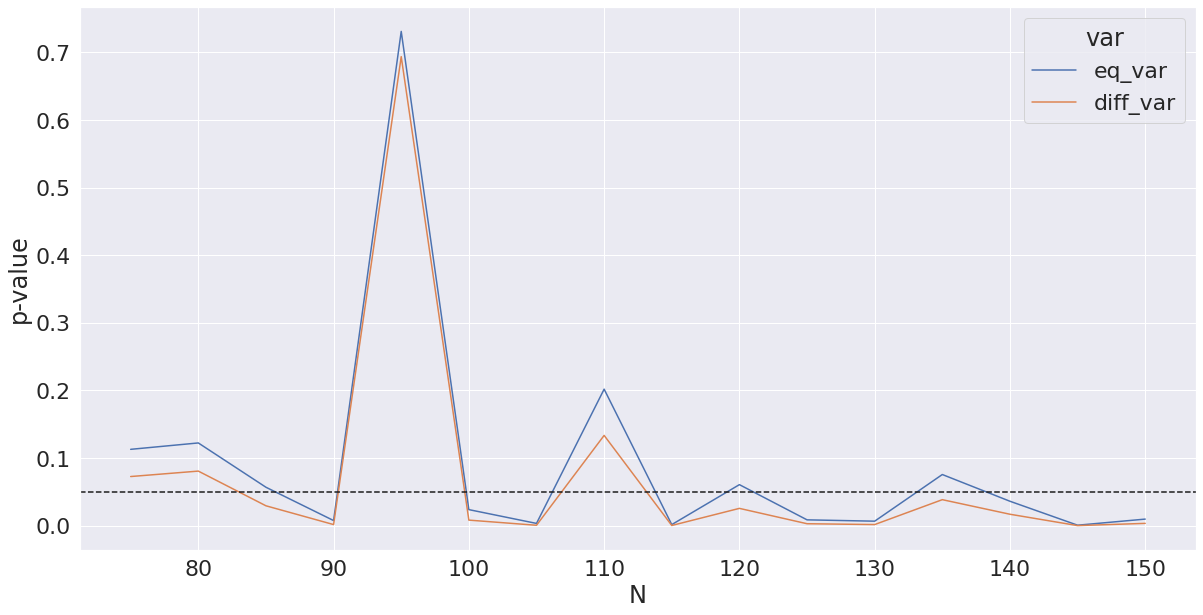

In [ ]:
ax = sns.lineplot(
    data=df_pvalues,
    x='N',
    y='p-value',
    hue='var',
)

ax.axhline(0.05, ls='--', c='k')

observe that the Welch's T-test (`diff_var`) performs better for this dataset with different variance.

You may try on datasets with equal variance, but generally for real world data the Welch's Test tends to out-perform the Student's test.

## (aside) we can observe the difference in the P-values due to the random number generator

Compare N=110 (high P value) with N=130 (low P-value)

Recall that these randomly generated data have the same mean and SD but due to random sampling, they just "happen" to be significant or non-significant.

We can see how sensitive statistical "significance" is to sampling.

Text(0.5, 1.0, 'P = 0.20')

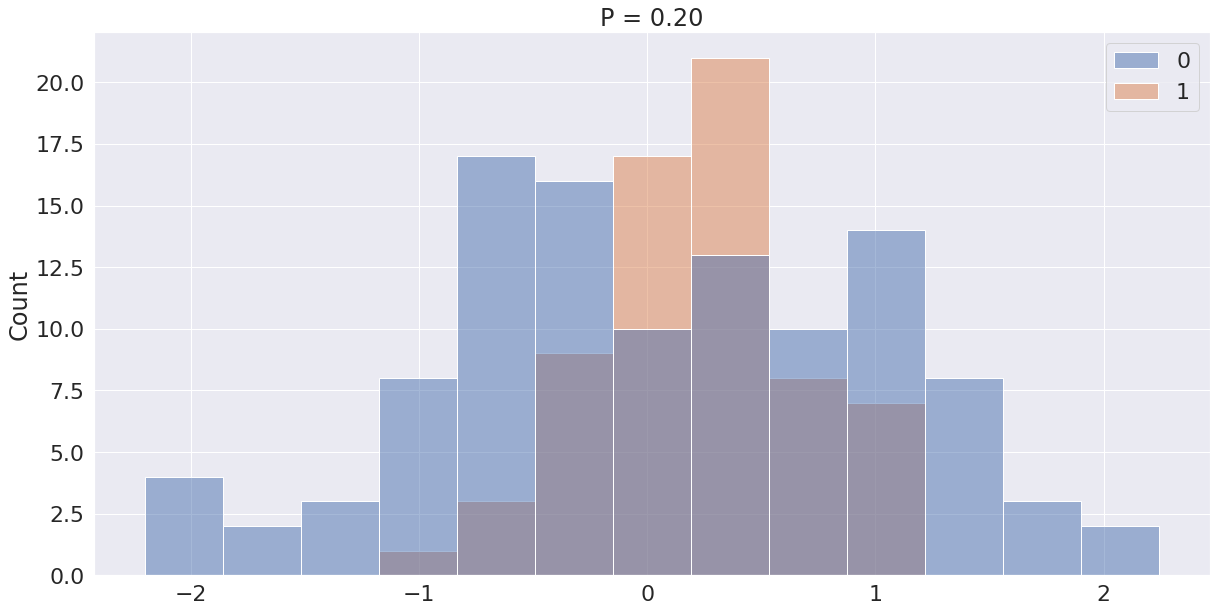

In [ ]:
ax = sns.histplot(
    data=pd.DataFrame(stored_xy[0][1:]).T,
)

ax.set_title('P = 0.20')


Text(0.5, 1.0, 'P = 0.001')

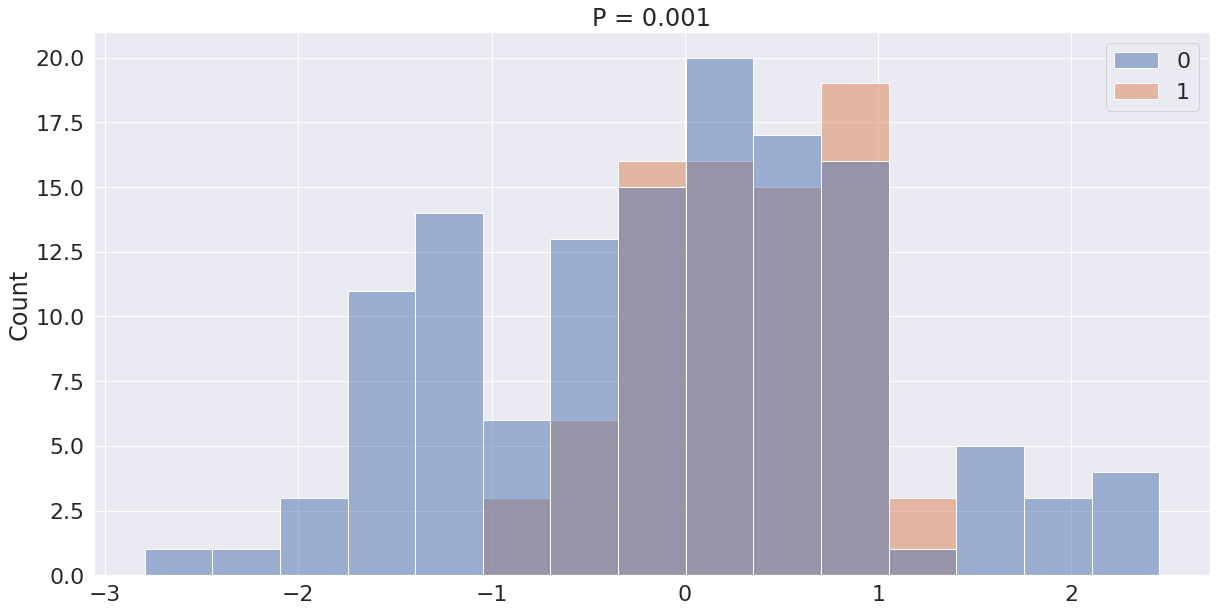

In [ ]:
ax = sns.histplot(
    data=pd.DataFrame(stored_xy[1][1:]).T,
)

ax.set_title('P = 0.001')

## optional to use the `statsmodels` library.

In [ ]:
# eq_var = ws.ttest_ind(x,y, usevar='pooled')
# diff_var = ws.ttest_ind(x,y, usevar='unequal')
# one_tailed_less = ws.ttest_ind(x,y, usevar='unequal', alternative='smaller')
# one_tailed_greater = ws.ttest_ind(x,y, usevar='unequal', alternative='larger')

# pd.DataFrame([eq_var, diff_var, one_tailed_less, one_tailed_greater], 
#              index=['eq_var_Students', 'diff_var_Welchs', 'one_tailed_less', 'one_tailed_greater'],
#              columns=['tstat', 'pvalue', 'df'],
#              )

,tstat,pvalue,df
eq_var_Students,-0.230655,0.817821,198.000000
diff_var_Welchs,-0.230655,0.817908,144.907186
one_tailed_less,-0.230655,0.408954,144.907186
one_tailed_greater,-0.230655,0.591046,144.907186


# Non-normal Distribution, comparing means of two unpaired samples

a.k.a. non-parametric tests, meaning you don't assume that the data follows a particular model and therefore has certain parameters. In this case, not assuming that the sample follows the model of "normal distribution".

First, let's create two non-normally distributed samples.



### Generate Non-normal Distributions

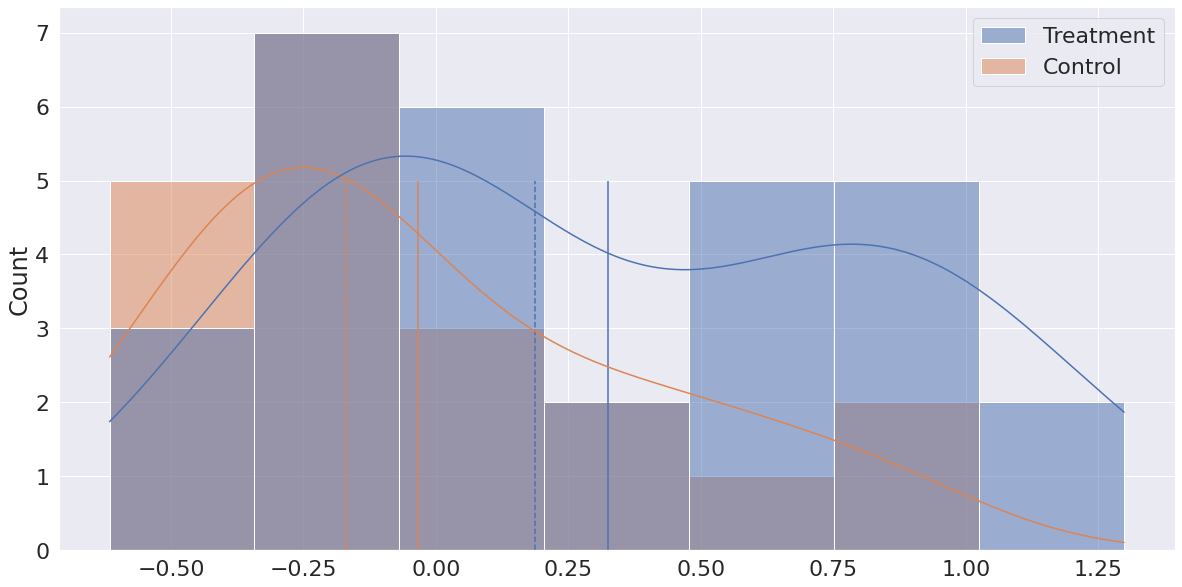

In [ ]:
seed = 5
rand_state = 5
rand = np.random.RandomState(seed)

x = np.hstack(
    [rand.normal(loc=0.0, scale=0.3, size=20), 
     rand.normal(loc=1.0, scale=0.3, size=10),
     ],
    )
y = np.hstack(
    [rand.normal(loc=-0.3, scale=0.5, size=15), 
     rand.normal(loc=0.2, scale=0.5, size=5),
     ],
    )

df_xy = pd.DataFrame([x,y], index=['Treatment', 'Control']).T

sns.histplot(
    data=df_xy,
    kde=True)

plt.vlines([np.mean(x), np.mean(y)] , 0, 5, colors=sns.color_palette(), label='means')
plt.vlines([np.median(x), np.median(y)] , 0, 5, colors=sns.color_palette(), ls='--', label='medians')

## what are we testing for?

Q: How likely is it that these two samples came from the same population?

Useful if trying to detect a difference between a control and experiment group.

e.g. If there is no difference then it *suggests* the treatment had no effect.

## The Rank Test - Mann-Whitney U (a.k.a Wilcoxon Rank Sum) Test

*Test if the probability of X being greater than Y is equal to the probability of Y being greater than X*

> A very general formulation is to assume that:
> * All the observations from both groups are independent of each other,
> * The responses are at least ordinal (i.e., one can at least say, of any two observations, which is the greater),
> * Under the null hypothesis H0, the distributions of both populations are identical.
> * The alternative hypothesis H1 is that the distributions are not identical.

Assumptions:

1. Your dependent variable should be measured at the ordinal or continuous level
2. Your independent variable should consist of two categorical, independent groups
3. You should have independence of observations
4. two variables are not normally distributed, but have similar *shape*

for manual method of calculation see https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

Note that recent papers have suggested to use the Brunner-Munzel Test instead becaues it makes fewer assumptions about the data.


### This is how the (invalid) t-test performs

In [ ]:
eq_var = ws.ttest_ind(x,y, usevar='pooled')
diff_var = ws.ttest_ind(x,y, usevar='unequal')
one_tailed_less = ws.ttest_ind(x,y, usevar='unequal', alternative='smaller')
one_tailed_greater = ws.ttest_ind(x,y, usevar='unequal', alternative='larger')

pd.DataFrame([eq_var, diff_var, one_tailed_less, one_tailed_greater], 
             index=['eq_var_Students', 'diff_var_Welchs', 'one_tailed_less', 'one_tailed_greater'],
             columns=['tstat', 'pvalue', 'df'],
             )


,tstat,pvalue,df
eq_var_Students,2.523769,0.014974,48.000000
diff_var_Welchs,2.643495,0.011153,46.427815
one_tailed_less,2.643495,0.994423,46.427815
one_tailed_greater,2.643495,0.005577,46.427815


## run the Mann-Whitney U test and Brunner-Menzel Test

MWU assumes **equal variance or equal distribution under null hypothesis**

BM allows for **unequal variance**

In [ ]:
print(sps.mannwhitneyu(x,y, alternative='two-sided'))
print(sps.brunnermunzel (x,y, alternative='two-sided'))

MannwhitneyuResult(statistic=423.0, pvalue=0.015272098147536953)
BrunnerMunzelResult(statistic=-2.723268195787125, pvalue=0.009261151803068093)


## One way to state results

Using a threshold of significance of alpha=0.05, the two samples were unlikely to be drawn from the same population (Two-sided Mann-Whitney U test statistic=423.0, P-value=0.015). This suggests that we should reject the null hypothesis and conclude that the treatment had an effect. (do we know what effect?)



## note that the `statsmodels` package runs Brunner-Menzel by default

you may compare the z and P>|z| to see that they are identical to `scipy.stats.brunnermunzel`

In [ ]:
from statsmodels.stats.nonparametric import rank_compare_2indep

print(rank_compare_2indep(x, y, use_t=False).summary())

# assuming normal distribution (which is not true in this case)
print(rank_compare_2indep(x, y, use_t=True).summary())

                  Probability sample 1 is stochastically larger                   
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
prob(x1>x2) c0     0.7050      0.075      2.723      0.006       0.507       0.803
                  Probability sample 1 is stochastically larger                   
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
prob(x1>x2) c0     0.7050      0.075      2.723      0.009       0.503       0.807


# Working with Paired Samples

## Data Generation

Just making two sets of non-normal samples with different means and variances and calling them paired.

Note that sample sizes must be identical (the definition of paired)

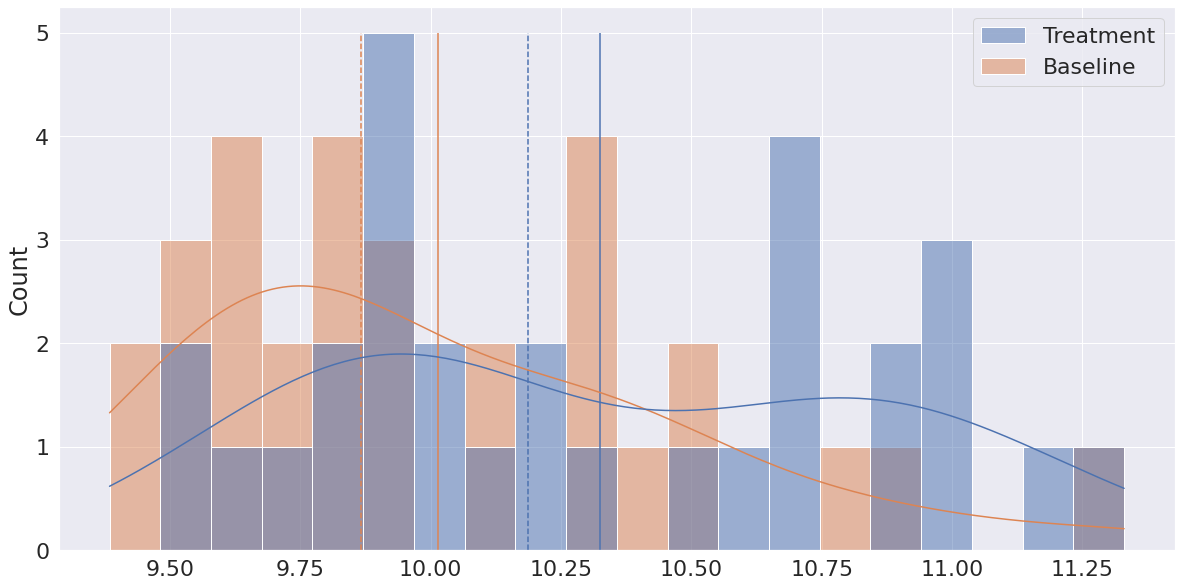

In [ ]:
seed = 5
rand_state = 5
rand = np.random.RandomState(seed)

s = 10

x = np.hstack(
    [rand.normal(loc=10.0, scale=0.3, size=s*2), 
     rand.normal(loc=11.0, scale=0.3, size=s),
     ],
    )
y = np.hstack(
    [rand.normal(loc=9.7, scale=0.5, size=s*2), 
     rand.normal(loc=10.2, scale=0.5, size=s),
     ],
    )

df_xy = pd.DataFrame([x,y], index=['Treatment', 'Baseline']).T
df_xy.index.name = 'Timepoint Pairs'

sns.histplot(
    data=df_xy,
    kde=True,
    bins=20)

plt.vlines([np.mean(x), np.mean(y)] , 0, 5, colors=sns.color_palette(), label='means')
plt.vlines([np.median(x), np.median(y)] , 0, 5, colors=sns.color_palette(), ls='--', label='medians')

What do the comparisons look like?

In [ ]:
df_xy['T>B?'] = df_xy.Treatment > df_xy.Baseline

df_xy

,Treatment,Baseline,T>B?
Timepoint Pairs,,,
0,10.132368,10.096527,True
1,9.900739,9.384214,True
2,10.729231,9.696903,True
3,9.924372,9.649466,True
4,10.032883,9.673846,True
5,10.474744,9.824609,True
6,9.727230,9.798830,False
7,9.822509,10.367424,False
8,10.056281,9.656562,True


Let's visualise these True and False in a more conducive way:

Text(0.5, 1.0, 'Was Test more than Baseline?')

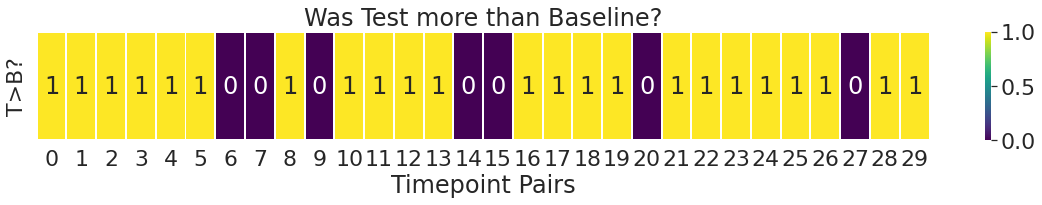

In [ ]:
p = plt.subplots(figsize=(20,2))
ax = sns.heatmap(df_xy.loc[:, ['T>B?']].T, annot=True, linewidths=1.0, cmap='viridis')
ax.set_title('Was Test more than Baseline?')

We see that some subjects worsened while most improved.

## The Paired T-test

Assumes:

* population means are normally distributed
* Same variance
* The data used to carry out the test should be fully paired. i.e. don't mix paired and unpaired observations.

In [ ]:
from scipy.stats import ttest_rel

ttest_rel(x,y, alternative='greater')

Ttest_relResult(statistic=3.2854574080354406, pvalue=0.0013325110360115366)

## Wilcoxon signed-rank test

The non-parametric version of the paired t-test.

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.



In [ ]:
from scipy.stats import wilcoxon

print(wilcoxon(x,y, alternative='two-sided'))

WilcoxonResult(statistic=98.0, pvalue=0.0056671726914977955)


## stating the results

The data suggested that Treatment improved the subjects' scores compared to their baseline (Paired T-test statistic=3.29, P-value=0.0013)

or 

(Wilcoxon signed-rank test statistic=367.0, P-value=0.0028)

# ANOVA

In [ ]:
ca = [int(x) for x in '''7 9 5 8 6 8 6 10 7 4'''.split()]
cb = [int(x) for x in '''4 3 6 2 7 5 5 4 1 3'''.split()]
cc = [int(x) for x in '''6 1 3 5 3 4 6 5 7 3'''.split()]

ca

[7, 9, 5, 8, 6, 8, 6, 10, 7, 4]

In [ ]:
from scipy.stats import f_oneway

f_oneway(ca, cb, cc)

F_onewayResult(statistic=8.180910099889008, pvalue=0.0016690121879002645)

# Tests for Correlation (covered in subsequent lecture)

## Generate Various Data

In [ ]:
seed = 22
rand_state = 22
rand = np.random.RandomState(seed)

scale = 1
num=50

x_funcs = [
    ('linear',          (lambda x: np.random.normal(2*x, scale))),
    ('linear_neg',      (lambda x: np.random.normal(-2*x, scale))),
    ('squared',         (lambda x: np.random.normal(x**2, scale))),
    ('squared_neg',     (lambda x: np.random.normal(-(x**2), scale))),
    ('cubed',           (lambda x: np.random.normal((x**3)/10, scale))),
    ('sqrt',            (lambda x: np.random.normal(x**0.5, scale))),
    ('log',             (lambda x: np.random.normal(np.log(x+0.2)*5+3, scale))),
    ('sin',             (lambda x: np.random.normal(5*np.sin(x*3.142), scale))),
]

x_in = np.linspace(0, 2, num=num)

x_generated = [res[1](x_in) for res in x_funcs]

df_examples = pd.DataFrame(x_generated, columns=x_in, index=[t[0] for t in x_funcs]).T
df_examples.index.name = 'x'
df_examples.reset_index(inplace=True)
df_examples_molten = pd.melt(df_examples, id_vars='x')



## Calculate correlations

In [ ]:
corrs = [
    ((np.round(sps.pearsonr(x_in, y)[0], 4), np.format_float_scientific(sps.pearsonr(x_in, y)[1], precision=1)), 
    (np.round(sps.spearmanr(x_in, y).correlation, 4), np.format_float_scientific(sps.spearmanr(x_in, y).pvalue, precision=1))) for y in x_generated]
corrs

[((0.7963, '4.7e-12'), (0.8061, '1.6e-12')),
 ((-0.8355, '4.5e-14'), (-0.8321, '7.0e-14')),
 ((0.8323, '6.9e-14'), (0.8335, '5.9e-14')),
 ((-0.7643, '1.1e-10'), (-0.7455, '5.3e-10')),
 ((0.251, '7.9e-02'), (0.233, '1.0e-01')),
 ((0.3716, '7.9e-03'), (0.3225, '2.2e-02')),
 ((0.9174, '7.8e-21'), (0.9392, '6.3e-24')),
 ((-0.754, '2.6e-10'), (-0.7378, '9.8e-10'))]

## Visualise data

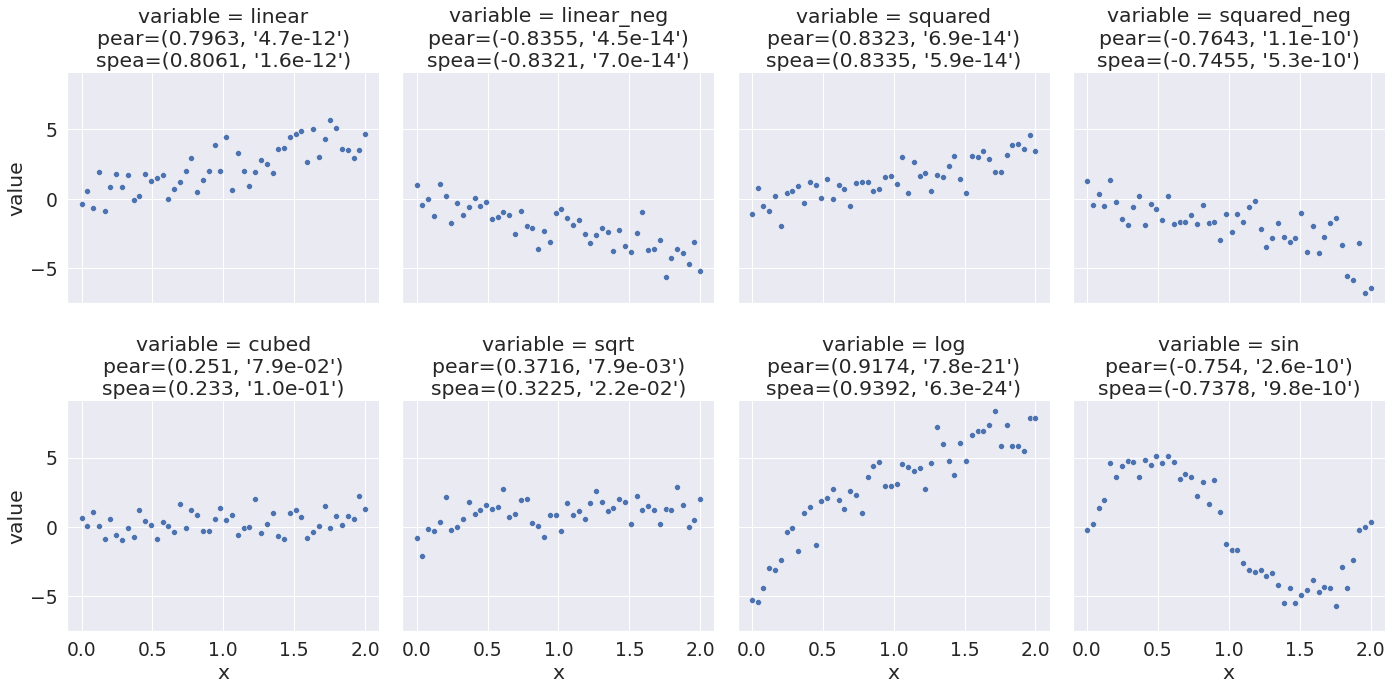

In [ ]:
sns.set(font_scale=1.7)

p = sns.relplot(
    data=df_examples_molten,
    kind='scatter',
    col='variable',
    col_wrap=4,
    y='value',
    x='x'
)

[ax.set_title(f'{ax.get_title()}\npear={c[0]}\nspea={c[1]}') for ax, c in zip(p.axes, corrs)];

plt.tight_layout()

# Application to OMICS data




## Get the data from GEO


Vecellio, Matteo, Elvezia Maria Paraboschi, Angela Ceribelli, Natasa Isailovic, Francesca Motta, Giulia Cardamone, Michela Robusto, et al. “DNA Methylation Signature in Monozygotic Twins Discordant for Psoriatic Disease.” Frontiers in Cell and Developmental Biology 9 (November 24, 2021): 778677. https://doi.org/10.3389/fcell.2021.778677.

In [ ]:
! pip install GEOparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 278 kB 4.2 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29065 sha256=5d8af42922ae02fc43a8bab0d2246909c3d453419421e80d8813200bd53a16c7
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa67c2ad6dcedad
Successfully built GEOparse


In [ ]:
import requests
import gzip
from io import StringIO

### using GEOparse to get the data

In [ ]:
import GEOparse

gse = GEOparse.get_GEO(geo="GSE186725", destdir="./")

15-Aug-2022 10:16:06 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
15-Aug-2022 10:16:06 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE186nnn/GSE186725/soft/GSE186725_family.soft.gz to ./GSE186725_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE186nnn/GSE186725/soft/GSE186725_family.soft.gz to ./GSE186725_family.soft.gz
100%|██████████| 154M/154M [00:33<00:00, 4.79MB/s]
15-Aug-2022 10:16:41 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
15-Aug-2022 10:16:41 DEBUG downloader - Moving /tmp/tmptpuijt6a to /content/GSE186725_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmptpuijt6a to /content/GSE186725_family.soft.gz
15-Aug-2022 10:16:41 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE186nnn/GSE186725/soft/GSE186725_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE

### combine the subject data into one table

In [ ]:
gsms_list = []

for k,v in gse.gsms.items():
    print(f'k={k}')
    if v.table.shape == (0,0): 
        print(f'{k} skipped')
        continue
    df = v.table.set_index('ID_REF').loc[:, ['VALUE']].rename(columns={'VALUE':k})
    gsms_list.append(df)

df_gsms = pd.concat(gsms_list, axis=1)
df_gsms

k=GSM5659264
k=GSM5659265
k=GSM5659266
k=GSM5659267
k=GSM5659268
k=GSM5659269
k=GSM5659270
k=GSM5659271
k=GSM5659272
k=GSM5659273
k=GSM5659274
k=GSM5659275
k=GSM5659276
k=GSM5659277
k=GSM5660021
GSM5660021 skipped
k=GSM5660022
GSM5660022 skipped
k=GSM5660023
GSM5660023 skipped
k=GSM5660024
GSM5660024 skipped
k=GSM5660025
GSM5660025 skipped
k=GSM5660026
GSM5660026 skipped
k=GSM5660027
GSM5660027 skipped
k=GSM5660028
GSM5660028 skipped
k=GSM5660029
GSM5660029 skipped
k=GSM5660030
GSM5660030 skipped
k=GSM5660031
GSM5660031 skipped
k=GSM5660032
GSM5660032 skipped
k=GSM5660033
GSM5660033 skipped
k=GSM5660034
GSM5660034 skipped


,GSM5659264,GSM5659265,GSM5659266,GSM5659267,GSM5659268,GSM5659269,GSM5659270,GSM5659271,GSM5659272,GSM5659273,GSM5659274,GSM5659275,GSM5659276,GSM5659277
ID_REF,,,,,,,,,,,,,,
cg21870274,0.717644,0.623090,0.699173,0.722394,0.620598,0.649515,0.654860,0.723397,0.667414,0.702514,0.663657,0.646835,0.672293,0.646838
cg23917638,0.222775,0.257145,0.261793,0.262462,0.286617,0.267334,0.267945,0.301237,0.294267,0.319399,0.283692,0.283053,0.292894,0.288995
cg11422233,0.105064,0.096016,0.098620,0.100831,0.114871,0.141795,0.184840,0.196612,0.094769,0.094737,0.117478,0.118236,0.110763,0.113184
cg16047670,0.084203,0.062902,0.075271,0.118412,0.153745,0.201933,0.081321,0.130133,0.081040,0.122973,0.129961,0.077088,0.115130,0.078989
cg17505339,0.894870,0.884246,0.861249,0.889788,0.884012,0.898232,0.887752,0.877330,0.892998,0.897178,0.880156,0.888185,0.864156,0.888791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg24129471,0.840429,0.812653,0.794934,0.807996,0.812888,0.815405,0.809935,0.806661,0.788117,0.816461,0.803382,0.804628,0.835555,0.788622
cg11295469,0.052575,0.039928,0.085418,0.038910,0.040018,0.050957,0.059428,0.042728,0.049503,0.042186,0.044931,0.051336,0.042148,0.056155
cg06701842,0.093307,0.091811,0.100394,0.092111,0.103767,0.090509,0.088102,0.114689,0.090540,0.104403,0.086506,0.099258,0.095164,0.081168


### get the phenotype data of disease state and twin set

In [ ]:
ser_affected = gse.phenotype_data.loc[:, 'characteristics_ch1.1.disease state']
ser_affected = ser_affected.loc[~ser_affected.isna()]
ser_affected = ser_affected.apply(lambda x: True if x=='affected' else False)
ser_affected.name = 'disease_state'
ser_affected = ser_affected.to_frame()
ser_affected['twin_set'] = [np.ceil(x/2) for x in range(1,15)]
ser_affected.index.name = 'ID_REF'
ser_affected

,disease_state,twin_set
ID_REF,,
GSM5659264,False,1.0
GSM5659265,True,1.0
GSM5659266,False,2.0
GSM5659267,True,2.0
GSM5659268,False,3.0
GSM5659269,True,3.0
GSM5659270,True,4.0
GSM5659271,False,4.0
GSM5659272,True,5.0


In [ ]:
# df_twins = pd.concat([
#     ser_affected.loc[ser_affected.disease_state, :].reset_index().set_index('twin_set', drop=True).gsm,
#     ser_affected.loc[~ser_affected.disease_state, :].reset_index().set_index('twin_set', drop=True).gsm
#     ],
#     axis=1,
#     )
# df_twins.columns=['affected', 'not_affected']
# df_twins

### filter to those DMP from paper corresponding to BRG1

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8653905/

In [ ]:
df_twinset_brg1 = df_gsms.filter(items=['cg17094383'], axis=0).T
df_twinset_brg1 = pd.concat([df_twinset_brg1, ser_affected], axis=1)
df_twinset_brg1

,cg17094383,disease_state,twin_set
GSM5659264,0.924222,False,1.0
GSM5659265,0.921660,True,1.0
GSM5659266,0.923499,False,2.0
GSM5659267,0.937779,True,2.0
GSM5659268,0.930018,False,3.0
GSM5659269,0.933518,True,3.0
GSM5659270,0.941234,True,4.0
GSM5659271,0.931634,False,4.0
GSM5659272,0.937788,True,5.0
GSM5659273,0.920090,False,5.0


## Visualise the two samples, ignoring paired-ness

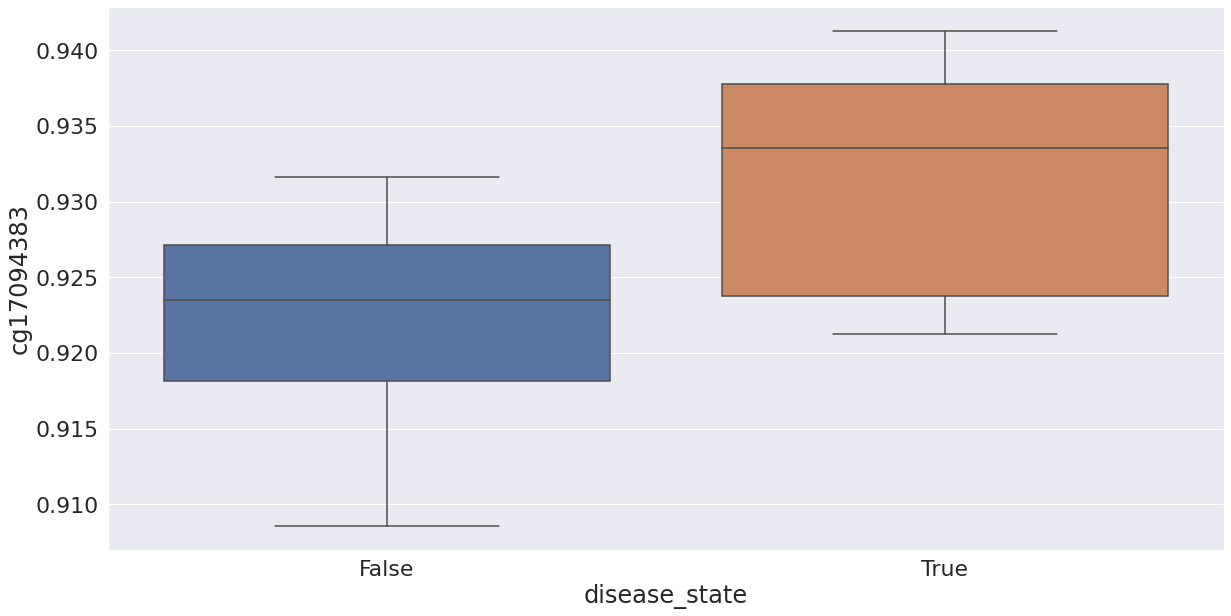

In [ ]:
ax = sns.boxplot(
    data=df_twinset_brg1,
    x='disease_state',
    # hue='twin_set',
    y='cg17094383',    
)

# ax.get_legend().remove()

This does not look like a good difference of means

## Visualise the distribution of samples

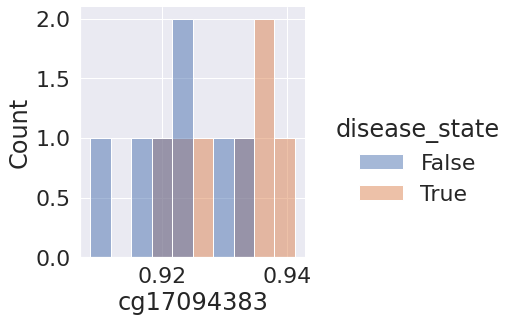

In [ ]:
ax = sns.displot(
    data=df_twinset_brg1,
    x='cg17094383',
    hue='disease_state',
    bins=10,
    kind='hist',
)

## Visualise samples with paired-ness

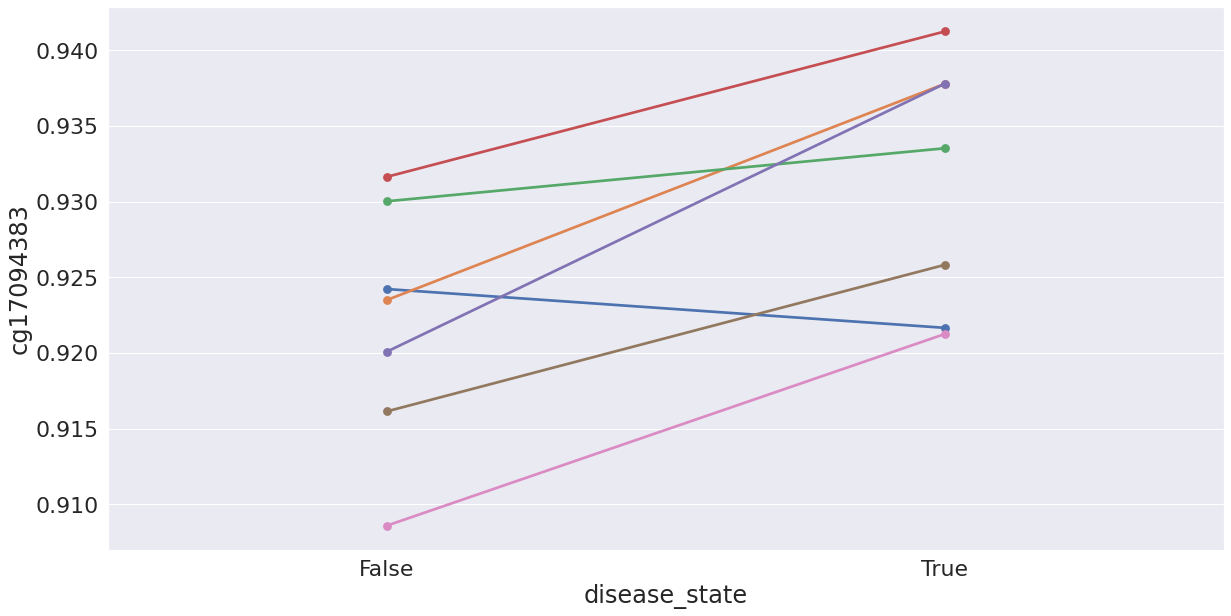

In [ ]:
ax = sns.pointplot(
    data=df_twinset_brg1,
    x='disease_state',
    hue='twin_set',
    y='cg17094383',    
)

ax.get_legend().remove()

# Test for normality

* We didn't use this for our synthetic data because we had preset the distribution.
* For real world data, one must test for normality



In [ ]:
# tests for normality
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

from scipy.stats import shapiro

print('diseaseFalse', shapiro(
    df_twinset_brg1.loc[~df_twinset_brg1.disease_state].iloc[:,0].values,
))

print('diseaseTrue', shapiro(
    df_twinset_brg1.loc[df_twinset_brg1.disease_state].iloc[:,0].values,
))

diseaseFalse ShapiroResult(statistic=0.9595460295677185, pvalue=0.8148298859596252)
diseaseTrue ShapiroResult(statistic=0.8794264793395996, pvalue=0.22391445934772491)


Since P-value is >> 0.05, we accept the two null hypotheses that:

1. the Healthy sample is indistinguishable from a normal distribution
2. the Disease sample is indistinguishable from a normal distribution

## paired t-test

`scipy.stats.ttest_rel(a, b)`

test takes two arrays of paired subjects

Assumptions

* dependent data must be continuous data (YES)
* observations are independent (YES)
* The dependent variable should be approximately normally distributed (YES)


If not normally distributed, we would have to use the Wilcoxon signed rank test.

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [ ]:
a = df_twinset_brg1.loc[~df_twinset_brg1.disease_state, 'cg17094383'].values
b = df_twinset_brg1.loc[df_twinset_brg1.disease_state, 'cg17094383'].values

sps.ttest_rel(a,b)

Ttest_relResult(statistic=-3.580526118870551, pvalue=0.011635729171796508)

In [ ]:
# this illustrates what happens if one could increase the sample size by double.

sps.ttest_rel(
    np.hstack([a,a]),
    np.hstack([b,b]),
)

Ttest_relResult(statistic=-5.27039174291761, pvalue=0.00015142040267497532)

In [ ]:
# if not normally distributed, we could have used the Wilcoxon signed rank test

sps.wilcoxon(a,b)

WilcoxonResult(statistic=1.0, pvalue=0.03125)

## Interpretation

P-value of 0.0116 although < 0.05 is not that good because:

* this was just one of a series of many statistics tests run over >700,000 probes, so will need to correct for multiple hypothesis testing. 
 * In the 700,000+ probes, it is highly likely that one would find some significant results, just by chance. 
 * 1% chance of a anomalous result means one expects to see 7000 such anomalies. 
 * The paper notes this point, and states that `p` would need to be less than `3.6e-8`.
* therefore, they needed to subject these hits to further tests and filters:
 1. checked by comparing to transcriptomics (downstream orthogonal confirmation?)
 1. are pathways surrounding this BRG1 gene affected? (internal consistent with multiple lines of evidence all converging?)
 1. do previous studies also suggest this (consensus and reproducibility from literature would suggest this is not a chance finding)

*spoiler: most of the final hits were not statistically significant. As a result, they could say that they suggest an influence on psoriasis.*


# Multiple Hypothesis Testing

**General steps:**

1. input your list of p-values
2. specify the desired family-wise error rate (the degree of false positives that you expect or can accept)
3. choose a method from a list (there are pros and cons for each)
4. run the command
5. receive a list of "adjusted p-values" corresponding to each of the original p-values.
6. those adjusted p-values below the FWER are considered statistically significant.

**Intuition:**

The more hypotheses (and hence statistical tests) you test on a dataset, the more likely to find a spurious result, so penalise your p-values accordingly.

A larger dataset means your signal has to be even stronger to be significant!

**Options in python:**

Multipy https://github.com/puolival/multipy

statsmodels https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html